# Examen Demo

In [3]:
# Your imports HERE !!!!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 01
- La serie de Fibonacci es una sucesión de números, en la cual cada número es la suma de los dos anteriores. Los dos primeros son siempre 0 y 1.
  - $F_0 = 0$
  - $F_1 = 1$
  - $F_n = F_{n-1} + F_{n-2}$
- Crear una serie de Fibonacci hasta un número *n* usando una función lambda.

In [4]:
expected_fibo_serie = [0,1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987,1597]
fibo_serie = fibonacci_lambda(len(expected_fibo_serie))  # This calls your lambda function fibonacci_lambda
assert(expected_fibo_serie == fibo_serie)  # This will fail if the serie is not correct

In [3]:
# Your solution HERE !!!!
from functools import reduce

fibonacci_lambda = lambda n: reduce(lambda x,y: x + [x[-1] + x[-2]], range(n-2), [0,1])

## 02
- Crear una función que reciba un array de NumPy y devuelva otro en el cual estén marcados como True los elementos duplicados (a partir de la segunda ocurrencia), y como False los no repetidos o las primeras ocurrencias de los duplicados.

In [6]:
numbers = np.array([4, 4, 4, 3, 8, 1, 9, 6, 1, 5, 9, 4, 0, 2])
expected_output = np.array([False, True, True, False, False, False, False, False, True, False, True, True, False, False])
output = find_duplicates(numbers)   # This calls your function find_duplicates
assert(np.array_equal(expected_output, output))  # This will fail if the result is not as expected

In [5]:
# Your solution HERE !!!!
def find_duplicates(input_array: np.ndarray)->np.array:
    l_duplicates = []
    output_array = np.zeros(input_array.shape, dtype=bool)
    
    for i, element in enumerate(input_array):
        if element not in l_duplicates:
            l_duplicates.append(element)
        else:
            output_array[i] = True
    
    return output_array

## 03
- Resolución de dos sistemas de ecuaciones
    - $ A : \begin{cases} -9x +  4y = 20 \\ -7y + 16x = 80                         \end{cases}$
    
    - $ B : \begin{cases} x - 2y + 3z = 7 \\ 2x + y + z = 4 \\ -3x + 2y -2z = -10 \end{cases}$
- Verifica por código los resultados

In [8]:
# Your solution HERE !!!!
import math

a = np.array([[-9, 4], [16, -7]])
b = np.array([20, 80])

x,y = np.linalg.solve(a,b)
print(math.isclose(-9*x + 4*y, 20))
print(math.isclose(-7*y + 16*x, 80))

True
True


## 04
- Crear un objeto Series con 10 elementos, que contenga más de un tipo básico, con índices de tipo string
- Demuestra que los datos con índices posicionales son los mismos que los obtenidos con índices semánticos, seleccionando a través de slicing, al menos 4 elementos de la serie anterior

In [12]:
# Your solution HERE !!!!

serie = pd.Series([1,2,3,4,5,6,7,8,'Manolo',True], index=list('abcdefghij'))
serie[:'e']

a    1
b    2
c    3
d    4
e    5
dtype: object

In [13]:
serie[:5]

a    1
b    2
c    3
d    4
e    5
dtype: object

In [15]:
serie[:'e'] == serie[:5]

a    True
b    True
c    True
d    True
e    True
dtype: bool

## 05
- Crear un DataFrame de dimensiones 10x10, con números aleatorios en el rango `[0,20]`
- Reemplazar todos aquellos elementos menores de 5 por NaN
- Averiguar cuantos elementos tienen Nan por fila

In [16]:
# Your solution HERE !!!!
frame = pd.DataFrame(np.random.randint(21, size=(10,10)))
display(frame)
frame[frame<5]=np.nan
display(frame)
print(frame.isnull().sum(axis=1))

,0,1,2,3,4,5,6,7,8,9
0,19,9,6,4,17,9,1,12,5,14
1,6,14,17,4,16,20,16,13,6,0
2,2,14,12,9,12,5,2,18,2,20
3,1,16,8,15,18,13,15,9,16,17
4,6,8,8,9,11,6,18,13,7,17
5,20,13,13,5,14,20,8,12,4,7
6,16,4,19,16,19,5,6,10,1,10
7,11,3,11,3,6,13,16,2,0,10
8,10,0,16,0,12,19,14,0,16,1
9,14,5,12,16,18,15,8,6,0,3


,0,1,2,3,4,5,6,7,8,9
0,19.0,9.0,6,NaN,17,9,NaN,12.0,5.0,14.0
1,6.0,14.0,17,NaN,16,20,16.0,13.0,6.0,NaN
2,NaN,14.0,12,9.0,12,5,NaN,18.0,NaN,20.0
3,NaN,16.0,8,15.0,18,13,15.0,9.0,16.0,17.0
4,6.0,8.0,8,9.0,11,6,18.0,13.0,7.0,17.0
5,20.0,13.0,13,5.0,14,20,8.0,12.0,NaN,7.0
6,16.0,NaN,19,16.0,19,5,6.0,10.0,NaN,10.0
7,11.0,NaN,11,NaN,6,13,16.0,NaN,NaN,10.0
8,10.0,NaN,16,NaN,12,19,14.0,NaN,16.0,NaN
9,14.0,5.0,12,16.0,18,15,8.0,6.0,NaN,NaN


0    2
1    2
2    3
3    1
4    0
5    1
6    2
7    4
8    4
9    2
dtype: int64


## 06
- Dada una lista de elementos, crea una función que devuelva un dataframe sin los elementos duplicados

In [6]:
serie = ['b','a','c','a','c','a','g']
expected_output = pd.DataFrame(['a','b','c','g'])
output = remove_duplicates(serie)   # This will call tour function remove_duplicates
assert(expected_output.equals(output))  # This will fail if the result is not as expected

AssertionError: 

In [1]:
# Your solution HERE !!!!
def remove_duplicates(serie):
    return pd.DataFrame(np.unique(serie))

In [11]:
remove_duplicates(serie)

,0
0,b
1,a
2,c
3,g


## 07
- La serie de Fibonacci es una sucesión de números, en la cual cada número es la suma de los dos anteriores. Los dos primeros son siempre 0 y 1.
  - $F_0 = 0$
  - $F_1 = 1$
  - $F_n = F_{n-1} + F_{n-2}$
- Crear un generador infinito de números de Fibonacci.

In [ ]:
fibo = [0,1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987,1597]
g = fibonacci_generator()  # This calls tour function fibonacci_generator
expected_output = [next(g) for n in range(len(fibo))]
assert(fibo == expected_output)  # This will fail if the output is not as expected


In [ ]:
# Your solution HERE !!!!
def fibonacci_generator():
    n_2 = 0
    n_1 = 1
    while True:
        yield n_2
        n_2, n_1 = n_1, n_2 + n_1        

## 08
- Crear una función que reciba una Serie de Pandas y devuelva esa misma serie, reemplazando los espacios en blanco por el carácter menos frecuente en dicha serie.

In [ ]:
serie = pd.Series(list('bba cabc faabba aacbbfe'))
expected_output = pd.Series(list('bbaecabcefaabbaeaacbbfe'))
output = clean_whitespace_replace(serie)  # This calls your function clean_whitespace_replace
assert(expected_output.equals(output))  # This will fail if result is not as expected

In [ ]:
# Your solution HERE !!!!

def clean_whitespace_replace(serie):
    less_freq = serie.value_counts().index[-1]
    serie[serie==' ']= less_freq
    return serie

In [1]:
# Your imports HERE !!!!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Dado un array de elementos, escribir una función, que reciba dicho array como parámetro de entrada y devuelva el elemento repetido. Usando plain Python, sin ninguna librería.

In [5]:
array_src = [4, 8, 0, 3, 6, 2, 1, 5, 3, 9, 7]
expected_rep_element = 3
rep_element = repeated_element(array_src) # This calls your function repeated_element
assert(expected_rep_element == rep_element)  # This will fail if the element is not found correctly

In [4]:
# Your solution HERE !!!!
def repeated_element(array_src):
    for element in array_src:
        if array_src.count(element) > 1: break
    return element

- Genera una matriz con valores aleatorios de 0 a 100 de dimensiones 16x16
- Calcula los siguentes estadísticos en la matriz anterior, por fila (el resultado de cada uno debe ser un array de dimensiones 1x16)
  - Suma de los elementos de cada fila
  - Media de los elementos de cada fila
  - Valores mínimos de cada fila
  - Valores máximos de cada fila

In [6]:
# Your solution HERE !!!!
mat = np.random.randint(101, size = (16, 16))
suma, media, minimo, maximo = [], [], [], []
for element in mat:
    suma.append(element.sum())
    media.append(element.mean())
    minimo.append(element.min())
    maximo.append(element.max())
    
print(f'Suma: {np.array(suma)}') 
print(f'Media: {np.array(media)}') 
print(f'Mínimo: {np.array(minimo)}') 
print(f'Máximo: {np.array(maximo)}') 

Suma: [684 797 685 781 797 857 730 838 664 743 635 754 843 687 780 887]
Media: [42.75   49.8125 42.8125 48.8125 49.8125 53.5625 45.625  52.375  41.5
 46.4375 39.6875 47.125  52.6875 42.9375 48.75   55.4375]
Mínimo: [ 1 10  4  0  0  0  1 11  0  0  7  0  9  1  3  8]
Máximo: [ 97 100  92 100  99  99  97  90  91  79  80  91  98  99  94  98]



- Generar un dataframe de 3x4 dimensiones con valores númericos aleatorios [0,10]
- Darle un índice semántico alfanumérico
- Aplicarle una función lambda que obtenga la diferencia entre el máximo y mínimo de cada fila

In [7]:
# Your solution HERE !!!!
df = pd.DataFrame(np.random.randint(11, size = (3, 4)), index = ('a', 'b', 'c'), columns = ('A', 'B', 'C', 'D'))
print(f'Solución: {list(map(lambda x: df.loc[x].max() - df.loc[x].min(), df.index))}')
display(df)

Solución: [10, 5, 9]


,A,B,C,D
a,4,10,0,0
b,9,5,4,6
c,8,10,8,1


- Crear un array de NumPy de dimensiones 8x5, con números enteros aleatorios en el rango [-100, 100]
- Ejecutar en este orden
  - Reemplazar valores  
    - Reemplazar los valores de todos aquellos números múltiplos de 5 por 100
    - Reemplazar los valores de todos aquellos números múltiplos de 3 por Nan
   
  - Averiguar cuantos elementos tienen Nan por fila
  - Reemplazar los valores de Nan por 0

In [8]:
# Your solution HERE !!!!
arr = np.random.randint(-100, 101, size = (8, 5))
display(arr)

array([[ 46, -11, -59,  -6,  30],
       [-20, -76,  -1,  -5, -59],
       [-17, -55,  25,  41,  83],
       [-88,  44,  40,  47,  89],
       [-62,  69,  36,   2,  63],
       [ 56, -29,  86,   8,  31],
       [ 88,  95, -34,  16,   0],
       [ -4, -40,  48,  -9, -16]])

In [9]:
arr[arr % 5 == 0] = 100
display(arr)

array([[ 46, -11, -59,  -6, 100],
       [100, -76,  -1, 100, -59],
       [-17, 100, 100,  41,  83],
       [-88,  44, 100,  47,  89],
       [-62,  69,  36,   2,  63],
       [ 56, -29,  86,   8,  31],
       [ 88, 100, -34,  16, 100],
       [ -4, 100,  48,  -9, -16]])

In [10]:
new_arr = pd.DataFrame(arr)
display(new_arr)

,0,1,2,3,4
0,46,-11,-59,-6,100
1,100,-76,-1,100,-59
2,-17,100,100,41,83
3,-88,44,100,47,89
4,-62,69,36,2,63
5,56,-29,86,8,31
6,88,100,-34,16,100
7,-4,100,48,-9,-16


In [11]:
new_arr[new_arr % 3 ==0] = np.nan
display(new_arr)

,0,1,2,3,4
0,46,-11.0,-59.0,NaN,100.0
1,100,-76.0,-1.0,100.0,-59.0
2,-17,100.0,100.0,41.0,83.0
3,-88,44.0,100.0,47.0,89.0
4,-62,NaN,NaN,2.0,NaN
5,56,-29.0,86.0,8.0,31.0
6,88,100.0,-34.0,16.0,100.0
7,-4,100.0,NaN,NaN,-16.0


In [12]:
new_arr.isna().sum()

0    0
1    1
2    2
3    2
4    1
dtype: int64

In [13]:
np.where(np.isnan(new_arr), 0, new_arr)

array([[ 46., -11., -59.,   0., 100.],
       [100., -76.,  -1., 100., -59.],
       [-17., 100., 100.,  41.,  83.],
       [-88.,  44., 100.,  47.,  89.],
       [-62.,   0.,   0.,   2.,   0.],
       [ 56., -29.,  86.,   8.,  31.],
       [ 88., 100., -34.,  16., 100.],
       [ -4., 100.,   0.,   0., -16.]])

- Crear una función que reciba una lista de strings y devuelva una serie de pandas, y convierta el primer y último carácter de la palabra de cada elemento de la serie a mayúsculas

In [16]:
languages = ['python', 'php', 'java', 'javascript', 'c++', 'sql']
expected_output = pd.Series(['PythoN', 'PhP', 'JavA', 'JavascripT', 'C++', 'SqL'])
output = first_last_uppercase(languages)  # This calls your function first_last_uppercase
assert(expected_output.equals(output))  # This will fail if the two lists are different

In [15]:
# Your solution HERE !!!!
def first_last_uppercase(languages):
    return pd.Series(map(lambda language: ''.join([language[0].capitalize(), language[1:-1], language[-1].capitalize()]), languages))


- Se tienen cuatro datasets, se adjuntan sus datos como diccionarios
  - Orders, representa un conjunto de pedidos, con sus fechas, su cantidad, y el cliente y vendedor asociados al mismo
  - Customers, conjunto de clientes, con su nombre y su ciudad
  - Salesman, conjunto de vendedores, con su nombre, ciudad y porcentaje de comisión por venta
  - Cities, conjunto de ciudades con sus nombres
- Obtener la siguiente información usando Pandas
  - El nombre del vendedor con la mejor venta, y a que cliente ha sido
  - Dinero de la comisión otorgada para cada pedido, ordenado por fechas
  - Media del dinero de los pedidos de los clientes de Tokyo
  - Total del dinero de las comisiones del vendedor Ikuzu Midoriya en el mes de Agosto
- Representar graficamente
  - Media del total de cada pedido para cada cliente agrupado por ciudad
  - Línea temporal del total de los pedidos

In [17]:
orders = {'OrderId': [1,2,3,4,5,6], 'OrderDate': ['2021-07-23', '2021-08-06', '2021-07-28', '2021-08-04', '2021-08-03', '2021-07-30'], 'Amount': [1500.5,2000.65,1550.2,1900.75,2205.4, 1208.22], 'CustomerId': [3,4,2,2,1,4], 'SalesmanId': [3,3,2,1,3,2]}
customers = {'CustomerId': [1,2,3,4], 'Name': ['Brad Davis', 'Julian Green', 'Geoff Cameron', 'Fabian Johnson'], 'CityId': [2,1,2,3]}
salesmans = {'SalesmanId': [1,2,3], 'Name': ['James Knite', 'Reinhardt Wilhelm', 'Ikuzu Midoriya'], 'CityId': [1,3,2], 'Comission': [0.15,0.11,0.09]}
cities = {'CityId': [1,2,3], 'Name': ['New York', 'Tokyo', 'Berlin']}

In [18]:
# Your solution HERE !!!!
order_table = pd.DataFrame(orders)
display(order_table)

,OrderId,OrderDate,Amount,CustomerId,SalesmanId
0,1,2021-07-23,1500.50,3,3
1,2,2021-08-06,2000.65,4,3
2,3,2021-07-28,1550.20,2,2
3,4,2021-08-04,1900.75,2,1
4,5,2021-08-03,2205.40,1,3
5,6,2021-07-30,1208.22,4,2


In [19]:
customer_table = pd.DataFrame(customers)
display(customer_table)

,CustomerId,Name,CityId
0,1,Brad Davis,2
1,2,Julian Green,1
2,3,Geoff Cameron,2
3,4,Fabian Johnson,3


In [20]:
salesman_table = pd.DataFrame(salesmans)
display(salesman_table)

,SalesmanId,Name,CityId,Comission
0,1,James Knite,1,0.15
1,2,Reinhardt Wilhelm,3,0.11
2,3,Ikuzu Midoriya,2,0.09


In [21]:
city_table = pd.DataFrame(cities)
display(city_table)

,CityId,Name
0,1,New York
1,2,Tokyo
2,3,Berlin


In [22]:
# up = t[t['Name'] == 'pepe']['gus'].values[0]
vendedor_venta_cliente = pd.DataFrame(order_table.groupby(['SalesmanId', 'Amount']).agg('CustomerId').value_counts()).iloc[-1:]
vendedor_venta_cliente.rename(columns = {"CustomerId":"CustomerId_ex"}, inplace = True)
vendedor_venta_cliente.reset_index(inplace = True)
vendedor_venta_cliente.drop('CustomerId_ex', axis = 1, inplace = True)
name_customer = customer_table[customer_table['CustomerId'].isin(vendedor_venta_cliente['CustomerId'])]['Name'].values
name_salesman = salesman_table[salesman_table['SalesmanId'].isin(vendedor_venta_cliente['SalesmanId'])]['Name'].values
print(f'El nombre del vendedor con la mejor venta es: {name_salesman}, al cliente {name_customer}')

El nombre del vendedor con la mejor venta es: ['Ikuzu Midoriya'], al cliente ['Brad Davis']


In [23]:
city_id_tokyo = city_table[city_table['Name'] == 'Tokyo']['CityId'].values
customer_id_tokyo =  customer_table[customer_table['CityId'].isin(city_id_tokyo)]['CustomerId'].values
mean_tokyo = order_table[order_table['CustomerId'].isin(customer_id_tokyo)]['Amount'].mean()
print(f'Media del dinero de los pedidos de los clientes de Tokyo: {mean_tokyo}')


Media del dinero de los pedidos de los clientes de Tokyo: 1852.95


In [24]:
ikuzu = salesman_table[salesman_table['Name'] == 'Ikuzu Midoriya']['SalesmanId'].values
ikuzu_table = order_table[order_table['SalesmanId'].isin(ikuzu)].groupby('OrderDate').agg('Amount').value_counts()
total = ikuzu_table.index[1][1] + ikuzu_table.index[2][1]
print(f'Total del dinero de las comisiones del vendedor Ikuzu Midoriya en el mes de Agosto: {total}')

Total del dinero de las comisiones del vendedor Ikuzu Midoriya en el mes de Agosto: 4206.05


- Escribir un generador `frange` que simule el comportamiento de la función `arange` de NumPy
- Esta función cada vez que se invoque debe devolver valores espaciados uniformemente a partir de un valor inicial. Se debe proveer a dicha función un valor inicial para la secuencia de números y un valor para el step
- Debe soportar valores númericos en coma flotante
- La función potencialmente se puede llamar un número infinito de veces
- Usando plain Python, sin ninguna librería

In [30]:
import math

init = 10.6
step = 0.8
g = frange(init, step)  # This calls your function frange

iters = 10
numbers = [next(g) for n in range(iters)]
for i, n in enumerate(numbers):
    assert(math.isclose(n, init + (step * i)))  # This will fail if the range is not properly created

In [29]:
# Your solution HERE !!!!
def frange(init, step):
    temp = float(init)
    yield temp
    while True:
        temp = temp + step
        yield temp

- Crear una lista de meses de Enero a Diciembre (eje X)
- Generar datos aleatorios para el eje Y, hacerlo 3 veces distintas (Y0, Y1 e Y2)
- Representar las 3 secuencias de datos aleatorios en una sola figura usando matplotlib
- Añadir una leyenda para poder identificar cada secuencia
- Nombrar las 3 secuencias de la siguiente manera ("Facebook", "Twitter", "Instagram")
- Añadir un título y nombres a los dos ejes
- Añadir una anotación (texto y flecha) a uno de los gráficos

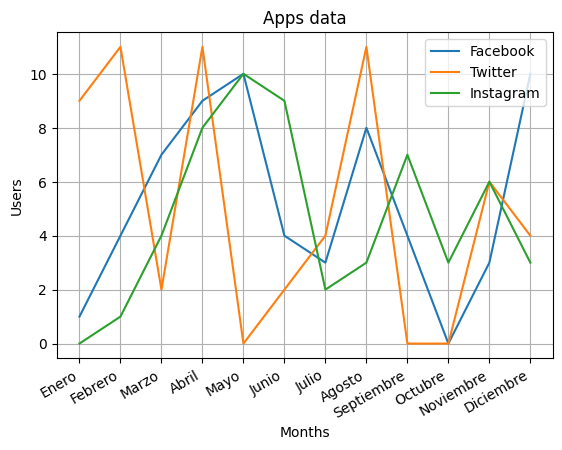

In [28]:
# Your solution HERE !!!!
months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
Y0, Y1, Y2 = [np.random.randint(12, size = (12)) for _ in range(3)]

fig, axis = plt.subplots(1,1)

axis.plot(months, Y0, label = 'Facebook',)
axis.plot(months, Y1, label = 'Twitter')
axis.plot(months, Y2, label = 'Instagram')

axis.legend(loc = 'best')

axis.set_title('Apps data')
axis.set_xlabel('Months')
axis.set_ylabel('Users')

fig.autofmt_xdate()

plt.grid()
plt.show() 


In [6]:
# Your answer here!!!
# En primer lugar para hacer este apartado agrupamos por id de la estacion todas las filas del df base. Posteriormente, como solo nos interesan
# las bicis disponibles, aplicamos al groupby la operacion de media a la columna available para que se refleje la media de las disponibles por id estacion
df_grouped_by_id = df_reduced\
                    .groupby('number')\
                    .agg({'available': ['mean']})

# A modo de limpieza visual y comodidad en el coodigo, unificamos en una columna las operaciones hechas a cada columna del df base
df_grouped_by_id.columns = ['_'.join(col).strip() for col in df_grouped_by_id.columns.values]

df_grouped_by_id

,available_mean
number,
1,4.175155
2,7.286957
3,4.822360
4,5.140373
5,5.036025
...,...
272,11.763975
273,13.212422
274,12.566460
